# Plotting xenobiotic metabololism

This is to visualize the metabolites in our project of identifying products in cell culture from xenobiotic compounds. The input data are tab-delimited text file, with columns shown in the demo data.

Shuzhao Li, 2019-08-22

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# list what's in this directory
!ls

 demo_u2c_plotting.ipynb   dummy.expt13.txt   U2C_experiment1
 docs			  'Experiment 13'     U2C_experiment2


In [3]:
mydata = pd.read_csv('dummy.expt13.txt', sep="\t")
mydata.head()

,groups,m/z,rtime,1a_120k_c18_001.mzXML Peak area,1b_120k_c18_001.mzXML Peak area,2a_120k_c18_001.mzXML Peak area
0,a,371.536394,0.066981,1.289611e+06,1.204986e+06,8.772162e+05
1,a,218.962006,0.107198,0.000000e+00,3.355097e+03,0.000000e+00
2,b,289.008666,0.300595,1.350600e+06,2.132454e+06,6.558539e+05
3,b,428.005507,0.300656,4.517140e+05,4.611999e+05,3.322206e+05
4,b,357.101949,0.303048,4.373292e+06,4.938692e+06,3.443556e+06


In [4]:
# Get the lists of group, m/z, rtime, and log2(intensity)

def digitalize_group(group):
    # reasign groups as numbers, so that they can be used for colormaps
    tmp_group = list(set(group))
    tmp_group = [(tmp_group[ii], ii) for ii in range(len(tmp_group))]
    tmp_group_dict = dict(tmp_group)
    return [tmp_group_dict[x] for x in group]

group = mydata['groups']
group = digitalize_group(group)

mz = mydata['m/z']

# converting time to seconds
rt = [int(x*60) for x in mydata['rtime']]

# We are using 1a column only here
log2data = np.log2( mydata['1a_120k_c18_001.mzXML Peak area'] + 1 )

print("Length of data is ", len(mz))
for Y in [group, mz, rt, log2data]:
    print(Y[:5])
    print("\n~~~~~~~~~~~~~~~\n")


Length of data is  29
[12, 12, 4, 4, 4]

~~~~~~~~~~~~~~~

0    371.536394
1    218.962006
2    289.008666
3    428.005507
4    357.101949
Name: m/z, dtype: float64

~~~~~~~~~~~~~~~

[4, 6, 18, 18, 18]

~~~~~~~~~~~~~~~

0    20.298506
1     0.000000
2    20.365170
3    18.785053
4    22.060289
Name: 1a_120k_c18_001.mzXML Peak area, dtype: float64

~~~~~~~~~~~~~~~



### Plotting data points

Modify input data and styling as needed.

Group can be defined by input compound.

We can pool all compounds in one figure as overview, or separate data into multiple plots for clarity. Two examples are given below.

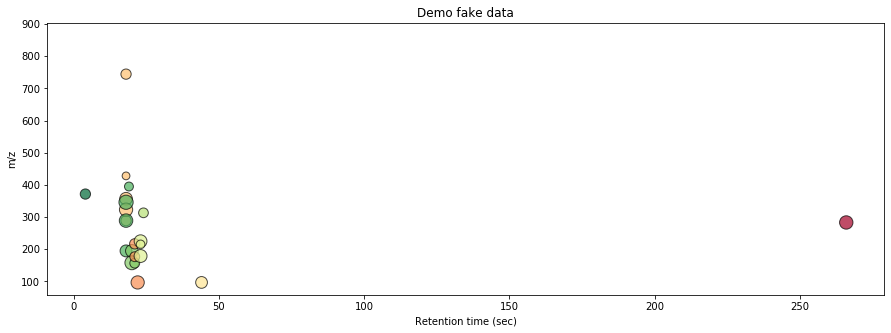

In [5]:
# ploting full range of data
# first to construct styling parameters
minimal_intensity = min([x for x in log2data if x > 0])
sizes = [(max(x-minimal_intensity+2, 0))*30 for x in log2data]
colors = group

fig = plt.figure(figsize=(15, 5))
plt.scatter(rt, mz, 
            s=sizes, linewidth=1, edgecolor='k',
            alpha=0.7, c=colors, 
            cmap=plt.cm.RdYlGn)
plt.xlabel("Retention time (sec)")
plt.ylabel("m/z")
plt.title("Demo fake data")
plt.show()

# comment out the last line and use this line to save file
# plt.savefig('good-data.pdf')

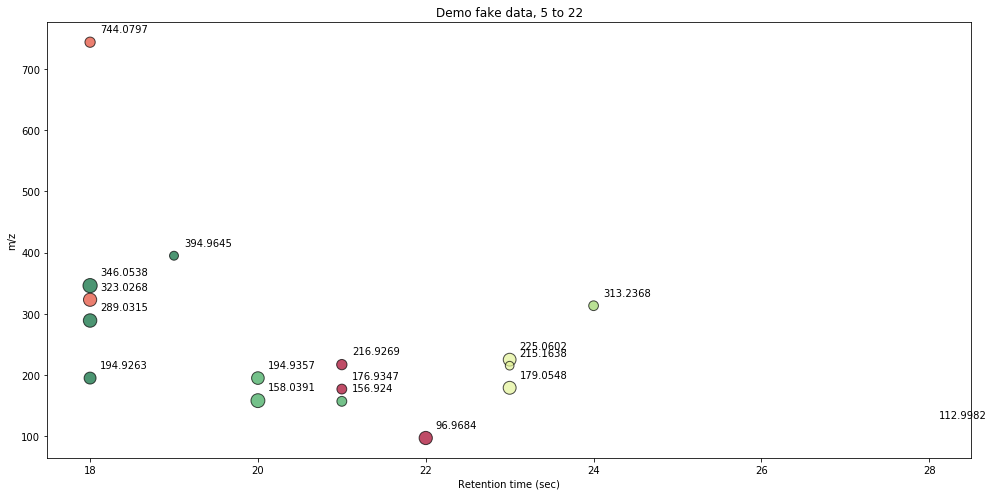

In [6]:
# ploting part of data, using data points here for example 5-22 (excluding 22)
START, END = 5, 22

# Since the input data are sorted by rtime, this takes part of the data by rtime
# Alternatively, we can filter input data before plotting.

fig = plt.figure(figsize=(14, 7))
plt.scatter(rt[START: END], mz[START: END], 
            s=sizes[START: END], linewidth=1, edgecolor='k',
            alpha=0.7, c=colors[START: END], 
            cmap=plt.cm.RdYlGn)

# Adding annotation of each data point, using formatted m/z here
notes = [str(round(x,4)) for x in mz]

for x,y,label in zip(rt[START: END], mz[START: END], notes[START: END]):
    plt.annotate(label,
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(10,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

plt.xlabel("Retention time (sec)")
plt.ylabel("m/z")
plt.title("Demo fake data, %d to %d" %(START, END))

plt.tight_layout()

plt.show()